In [1]:
import numpy as np
import pandas as pd

In [2]:
folder = "E:\\AIX_Research_Center\\Datas\\AnimalClassification\\"

**Sample Submission File**

In [4]:
submission = pd.read_csv(folder+'sample_submission.csv', sep=',')
submission.head()

,"id,label"
0,"ASG001dw7n_1.jpeg,1"
1,"ASG001dw7q_2.jpeg,0"
2,"ASG001dw7s_1.jpeg,0"
3,"ASG001dw7w_1.jpeg,1"
4,"ASG001dw7x_0.jpeg,0"


**Import necessary libraries**

In [5]:
from pathlib import Path

from fastai.basic_data import DatasetType
from fastai.callbacks import SaveModelCallback
from fastai.metrics import accuracy
from fastai.train import ClassificationInterpretation
from fastai.vision.data import ImageList
from fastai.vision.learner import cnn_learner
from fastai.vision.models import resnet18
from fastai.vision.transform import ResizeMethod, get_transforms
from fastai.vision import imagenet_stats
from PIL import Image

import numpy as np
import pandas as pd
#from google.colab import drive
from os import walk
from matplotlib import pyplot as plt
import warnings

In [6]:
warnings.filterwarnings('ignore')

**List of files in train-set elephants**

In [7]:
path = Path(folder)

In [8]:
train_elephants = []
for (dirpath, dirnames, filenames) in walk(folder+'train_elephants\\train_elephants'):
    train_elephants.extend(filenames)
train_elephants = np.array(train_elephants)

In [9]:
len(train_elephants)

7000

**List of files in test-set zebras**

In [10]:
train_zebras = []
for (dirpath, dirnames, filenames) in walk(folder+'train_zebras\\train_zebras'):
    train_zebras.extend(filenames)
train_zebras = np.array(train_zebras)

In [11]:
len(train_zebras)

6999

In [12]:
np.intersect1d(train_elephants, train_zebras)

array([], dtype='<U17')

In [19]:
elephants = np.array([train_elephants, [0 for i in range(len(train_elephants))]])

In [20]:
elephants.shape

(2, 7000)

**Create DataFrame**

Elephants dataframe set labels to zero

In [22]:
elephants= pd.DataFrame(elephants.T, columns=['id', 'label'])

In [23]:
elephants.head()

,id,label
0,ASG0014ip0_1.jpeg,0
1,ASG0014ip0_2.jpeg,0
2,ASG0014ip3_2.jpeg,0
3,ASG0014ip5_0.jpeg,0
4,ASG0014ip5_2.jpeg,0


Zebras dataframe set labels to one

In [24]:
zebras = np.array([train_zebras, [1 for i in range(len(train_zebras))]])

In [25]:
zebras= pd.DataFrame(zebras.T, columns=['id', 'label'])

In [27]:
train = pd.concat([elephants, zebras], ignore_index=True)

**Shuffle Train DataFrame**

In [28]:
train = train.sample(frac=1)

In [29]:
train.head()

,id,label
5194,ASG001bzq7_1.jpeg,0
12701,ASG001ev4u_1.jpeg,1
13979,ASG001g2sc_0.jpeg,1
3697,ASG0019gx6_0.jpeg,0
13889,ASG001fx4v_0.jpeg,1


In [30]:
train.describe()

,id,label
count,13999,13999
unique,13999,2
top,ASG001f5x2_1.jpeg,0
freq,1,7000


**Load Images**

In [33]:
path = Path(folder)

In [34]:
il = ImageList.from_df(df=train, path=path, folder='train')  #path, 'train_labels.csv', suffix='.png', folder='train')
sd = il.split_by_rand_pct(0.25)
ll = sd.label_from_df()

In [35]:
ll = ll.transform(size=224)
data = ll.databunch(bs=64).normalize(imagenet_stats)

**Check Datas**

In [36]:
data

ImageDataBunch;

Train: LabelList (10500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,1,0
Path: E:\AIX_Research_Center\Datas\AnimalClassification;

Valid: LabelList (3499 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,1,0,0
Path: E:\AIX_Research_Center\Datas\AnimalClassification;

Test: None

**Add test data**

In [37]:
test = (ImageList.from_folder(path.joinpath('test').joinpath('test'))) # , suffix='.JPG'
data.add_test(test)

In [38]:
data

ImageDataBunch;

Train: LabelList (10500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,1,0
Path: E:\AIX_Research_Center\Datas\AnimalClassification;

Valid: LabelList (3499 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,1,0,0
Path: E:\AIX_Research_Center\Datas\AnimalClassification;

Test: LabelList (5999 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: E:\AIX_Research_Center\Datas\AnimalClassification

**Show somes images**

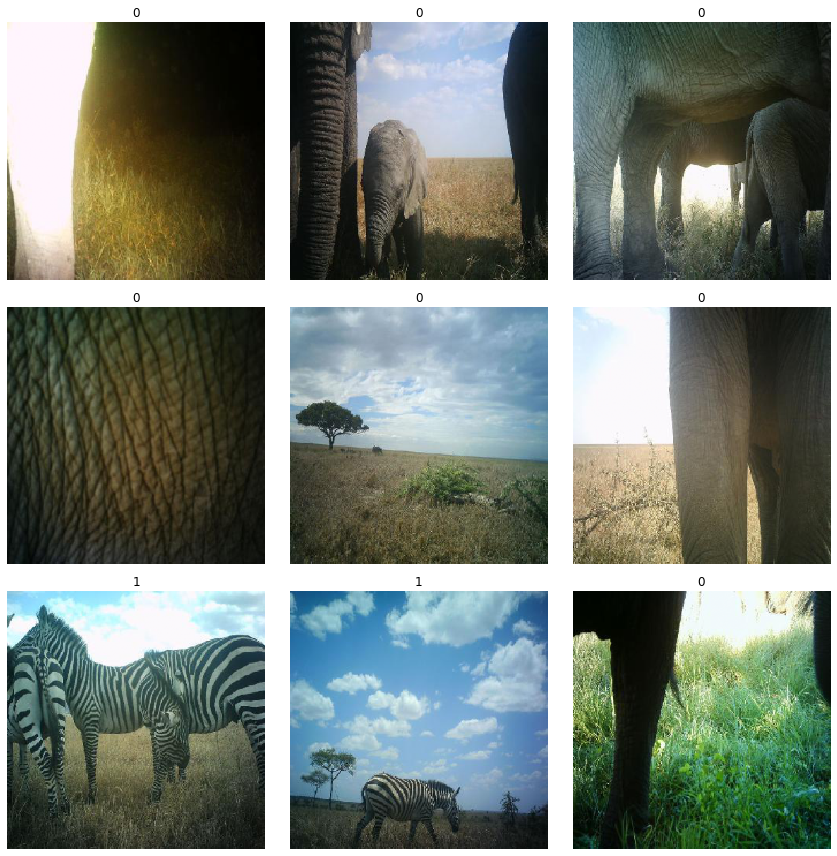

In [39]:
data.show_batch(3)

**Get Model**

In [40]:
learn = cnn_learner(data, resnet18, metrics=accuracy)

In [41]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [42]:
learn.opt_func

functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99))

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


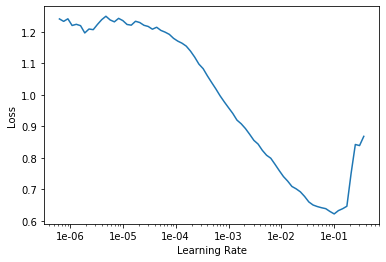

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
lr = 1e-2

In [45]:
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.103739,0.067971,0.972849,1:31:17


In [46]:
preds, y = learn.get_preds(DatasetType.Test)

In [49]:
learn.save('./animal_classif_knea')

In [51]:
preds

tensor([[1.0000e+00, 4.5430e-08],
        [1.0000e+00, 3.3714e-08],
        [1.0000e+00, 2.6511e-06],
        ...,
        [1.0000e+00, 2.3041e-08],
        [1.0000e+00, 9.8020e-07],
        [1.0000e+00, 3.0497e-09]])

In [52]:
y

tensor([0, 0, 0,  ..., 0, 0, 0])

In [56]:
str(path)

'E:\\AIX_Research_Center\\Datas\\AnimalClassification'

In [57]:
fnames = [str(o).split('/')[-1] for o in learn.data.test_ds.items]

In [59]:
fnames = [(o).split('\\')[-1] for o in fnames]

In [61]:
subm = pd.DataFrame({'id': fnames, 'label': preds[:, 1]})

In [62]:
subm.head()

,id,label
0,ASG0014ip3_0.jpeg,4.542974e-08
1,ASG0014ip3_1.jpeg,3.371393e-08
2,ASG0014ip5_1.jpeg,2.651125e-06
3,ASG0014ip9_0.jpeg,1.406423e-04
4,ASG0014ipc_0.jpeg,3.354272e-05


In [64]:
subm.to_csv('./submission/classif1.csv', index=False)

**Score** : 0.0535540506721031

In [65]:
preds, y, losses = learn.get_preds(with_loss=True)

In [66]:
interp = ClassificationInterpretation(learn, preds, y, losses)

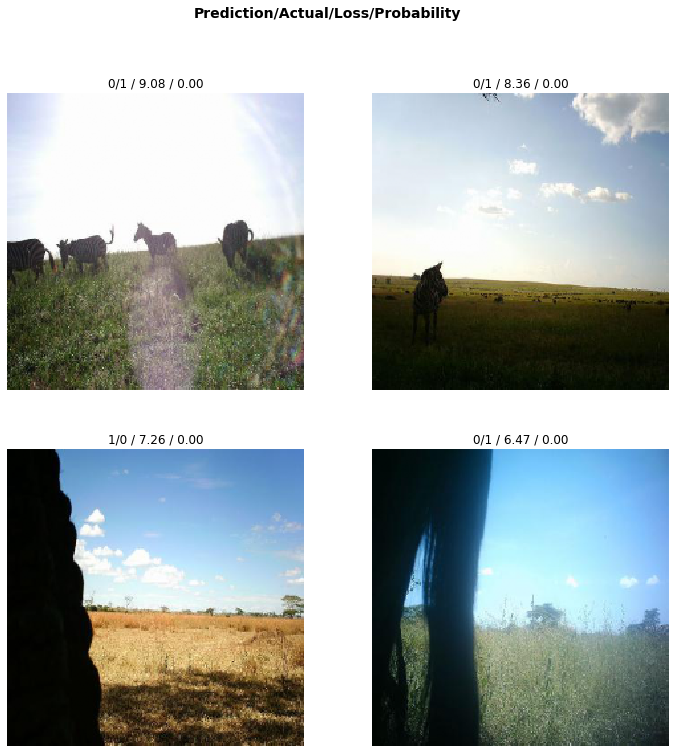

In [67]:
interp.plot_top_losses(4)

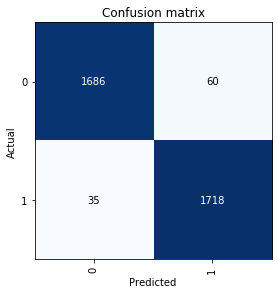

In [68]:
interp.plot_confusion_matrix()

In [70]:
interp.most_confused(5)

[('0', '1', 60), ('1', '0', 35)]

In [72]:
learn.export('./animal_classif_by_knea.pkl')